In [1]:
import read_chn as rc
import energy_calibration as ec

In [2]:
#must specify path to data
data_path = '/Users/angelabeatty/Documents/lbnlBLUR/coding/data/'

am_chn_LV = 'hp522171-am241-lv-092523.Chn'
cs_chn_LV = 'hp522171-cs137-lv-092523.Chn'

am_spe_path = '400V-cable20-am241.Spe'
cs_spe_path = '400V-cable19-cs137.Spe'

am_peak = 59.5
cs_peak = 661.6

In [3]:
#plot spectra to determine peak range, and initial fit parameters
#future improvements involve incorporating peak detection to skip this step

am_spe_u = 600
am_spe_l = 400
cs_spe_u = 6300
cs_spe_l = 6100

am_spe_p0 = [510,1600,10,100,490]
cs_spe_p0 = [6180,100,10,10,6160]

am_lv_p0 = [400,5000,10,500,375]
cs_lv_p0 = [4350,1000,10,50,4335]

# example: .Chn file

In [4]:
amlv_x,amlv_y = ec.read_data(data_path+am_chn_LV,5,5) #generic values for head/foot bc unneeded for .Chn

In [5]:
cslv_x,cslv_y = ec.read_data(data_path+cs_chn_LV,5,5) #generic values for head/foot bc unneeded for .Chn

/Users/angelabeatty/opt/anaconda3/envs/school/lib/python3.10/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


curve-fit results
[ 391.55302109 5355.09137163    8.14016323  573.44225183  375.        ] [mean, amp, stdev, step amp, step mean]
errors
[[inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]]
FWHM [channel]
19.12938358477134


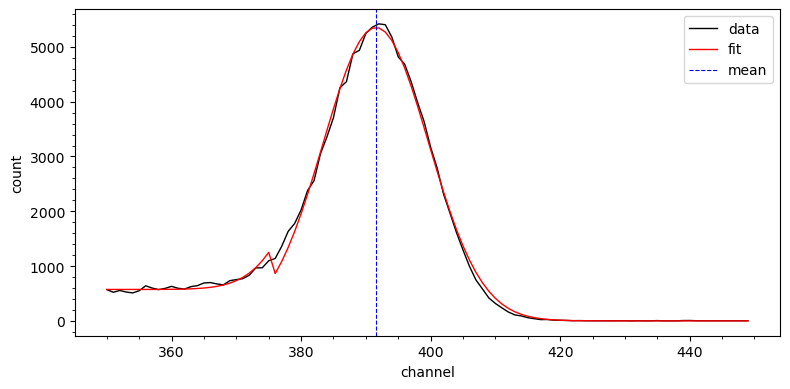

In [6]:
am_mean, am_fwhm = ec.spect('am241',amlv_y,am_peak,450,350,am_lv_p0,plotting=True)

curve-fit results
[4350.72863277  690.00743679    9.25002321   66.27284018 4335.        ] [mean, amp, stdev, step amp, step mean]
errors
[[inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]]
FWHM [channel]
21.737554547634314


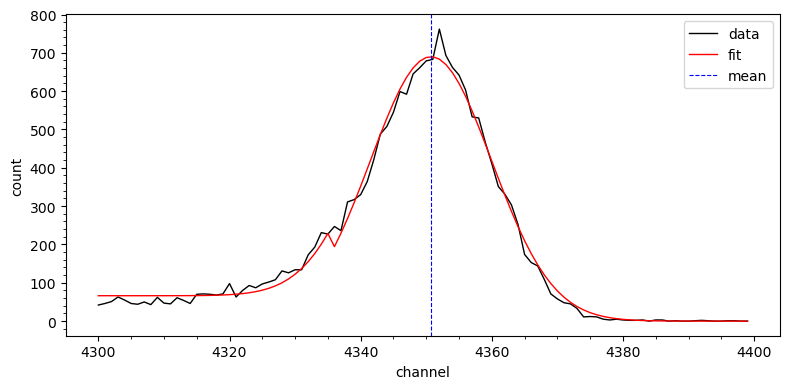

In [7]:
cs_mean,cs_fwhm = ec.spect('cs137',cslv_y,cs_peak,4400,4300,cs_lv_p0,plotting=True)

curve-fit results:
[ 0.15207711 -0.04625334] [m,b]
FWHM [keV]
am241 2.8628881027019886
cs137 3.25953121499724


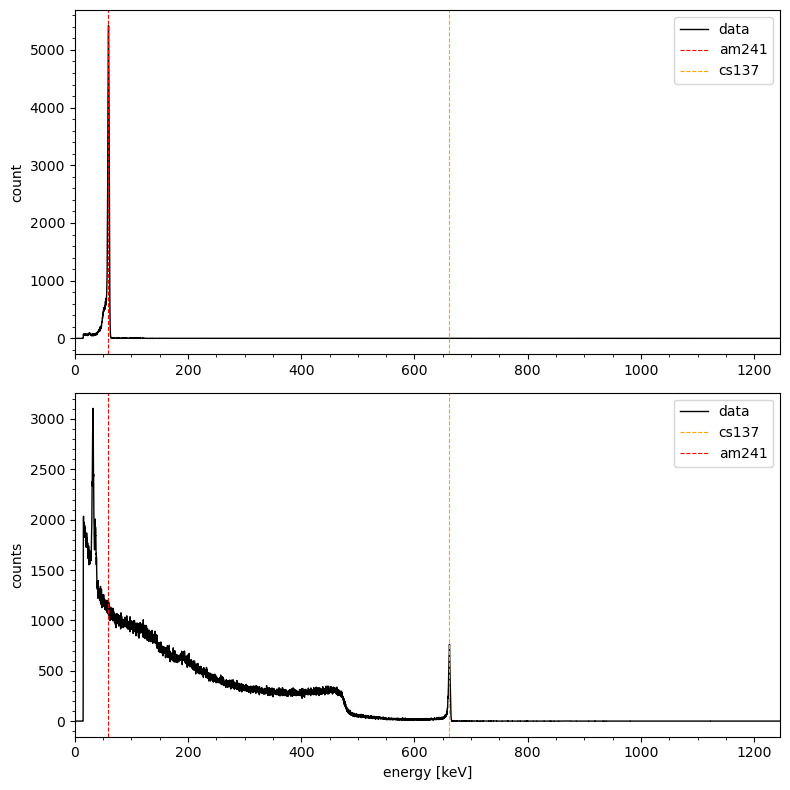

In [8]:
chn_vals = ec.energy_fit(am_peak,cs_peak,am_mean,cs_mean,amlv_x,cslv_x,amlv_y,cslv_y, \
                      am_fwhm,cs_fwhm,'am241','cs137',plotting=True)

# example: .Spe file

In [9]:
am_spe_x,am_spe_y = ec.read_data(data_path + am_spe_path,12,15) #head/footer may vary with file
cs_spe_x,cs_spe_y = ec.read_data(data_path + cs_spe_path,12,19) 

/Users/angelabeatty/opt/anaconda3/envs/school/lib/python3.10/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


curve-fit results
[ 507.19920379 1581.49499486    6.87223611  111.25844176  490.        ] [mean, amp, stdev, step amp, step mean]
errors
[[inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]]
FWHM [channel]
16.14975486325372


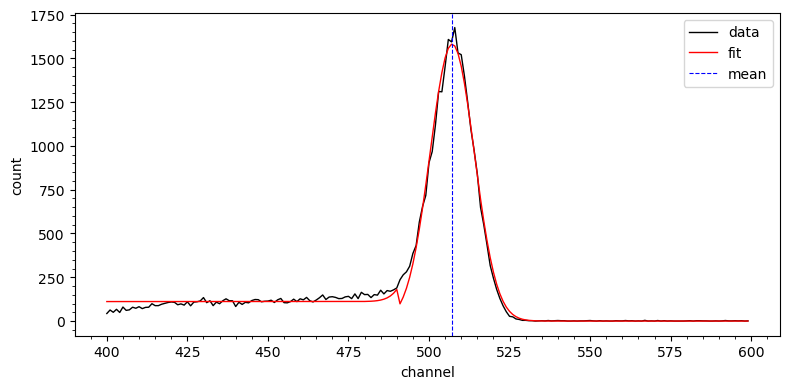

In [10]:
am_m, am_f = ec.spect('am241',am_spe_y,am_peak,am_spe_u,am_spe_l,am_spe_p0,plotting=True)

curve-fit results
[6183.87703928   68.91047452   11.20920531    8.06917583 6160.        ] [mean, amp, stdev, step amp, step mean]
errors
[[inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]]
FWHM [channel]
26.341632476863765


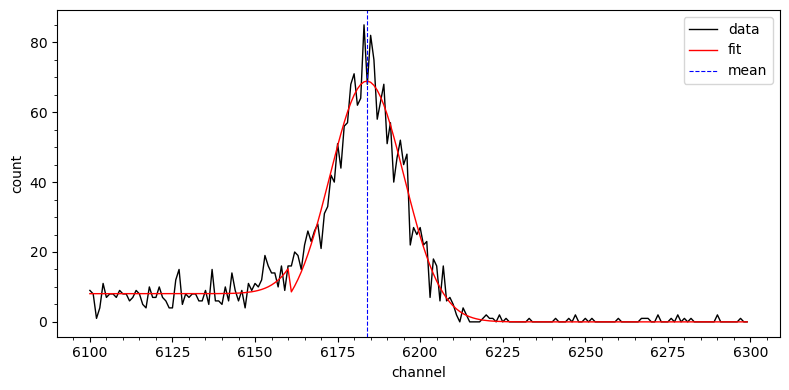

In [11]:
cs_m, cs_f = ec.spect('cs137',cs_spe_y,cs_peak,cs_spe_u,cs_spe_l,cs_spe_p0,plotting=True)

curve-fit results:
[0.10607822 5.71834038] [m,b]
FWHM [keV]
am241 7.431477696117881
cs137 8.512613973629264


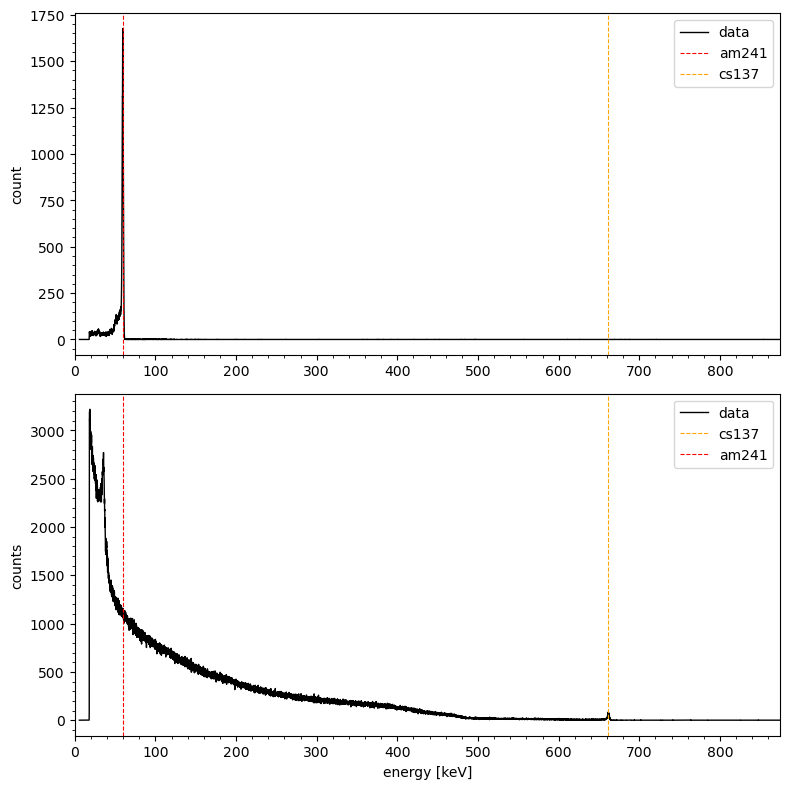

In [12]:
spe_vals = ec.energy_fit(am_peak,cs_peak,507,6183,am_spe_x,cs_spe_x,am_spe_y,cs_spe_y, \
                      am_f,cs_f,'am241','cs137',plotting=True)